In [11]:
#Analisando resultados da clusterização através das épocas
#Importando bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [35]:
#Carregando dados
df = pd.read_parquet("df_com_clusters_atualizados.parquet")

In [21]:
#Definindo funções
#Retorna a década em que o filme foi lançado
def get_decada(idade):
    ano_atual = datetime.now().year
    ano_do_filme = ano_atual - idade
    decada = (ano_do_filme // 10) * 10
    return f"{decada}s"

In [23]:
#Retorna um dicionário com décadas sendo suas chaves e a lucratividade total que um cluster obteve naquela década como seus valores
def coletar_lucro_medio_decada(dataset, filmes_decada, cluster):
    lucro_total = {decada: 0 for decada in filmes_decada}
    contagem_filmes = {decada: 0 for decada in filmes_decada}
    for _, row in dataset.iterrows():
        decada_filme = get_decada(row['idade'])
        lucro = row['lucro']
        if decada_filme in filmes_decada:
            lucro_total[decada_filme] += lucro
            contagem_filmes[decada_filme] += 1
    for decada in filmes_decada:
        if contagem_filmes[decada] > 0:
            filmes_decada[decada][cluster] = lucro_total[decada] / contagem_filmes[decada]
        else:
            filmes_decada[decada][cluster] = 0 
    
    return filmes_decada

In [25]:
#Plota um gráfico de barras que mostra o lucro médio de um cluster através das décadas
def plotar_lucro_decada(filmes_decada, cluster):
    df = pd.DataFrame([(decada, valores[str(cluster)]) for decada, valores in filmes_decada.items()],
                      columns=['Década', 'Lucro Médio'])
    df = df.sort_values(by='Década')
    fig = px.bar(df, x='Década', y='Lucro Médio', 
                 title=f'Lucro Médio do Cluster {cluster} por Década',
                 labels={'Lucro Médio': f'Lucro Médio do Cluster {cluster}', 'Década': 'Década'},
                 text_auto=True)
    fig.update_traces(marker=dict(color=cores_cinema)) 
    fig.show()

In [71]:
#Plota um gráfico com a maior lucratividade média por década, informando de qual cluster veio essa lucratividade
def plotar_maior_lucro_decada(filmes_decada):
    cluster_nomes = {
        '0': '(Comédia)',
        '1': '(Ação)',
        '2': '(Terror, Suspense)',
        '3': '(Drama)'
    }
    dados = []
    for decada, clusters in filmes_decada.items():
        max_cluster = max(clusters, key=clusters.get)  
        max_lucro = clusters[max_cluster]  
        dados.append((decada, max_lucro, cluster_nomes[max_cluster]))
    
    df = pd.DataFrame(dados, columns=['Década', 'Lucro Máximo', 'Cluster'])
    df = df.sort_values(by='Década')

    # Criando uma nova coluna para exibir no eixo X com quebra de linha
    df["Década_Cluster"] = df["Década"].astype(str) + "<br>" + df["Cluster"]

    fig = px.bar(df, x='Década_Cluster', y='Lucro Máximo', text_auto=True,
                 title='Maior Lucratividade por Década e Cluster',
                 labels={'Lucro Máximo': 'Maior Lucro na Década', 'Década_Cluster': 'Década e Cluster'},
                 hover_data=['Cluster'])

    fig.update_traces(marker=dict(color=cores_cinema)) 

    # Evita inclinação dos rótulos
    fig.update_layout(xaxis_tickangle=0)

    fig.show()

In [29]:
#Paleta de cores que vai ser utilizada nos gráficos
cores_cinema = ["#1B1B1B", "#D90429", "#FFD700", "#FFAA33", "#A2A2A2", 
                "#001F3F", "#8B4513", "#F5C518", "#5A5A5A", "#B22222"]

In [37]:
#Dividindo o dataset por clusters
cluster0 = df[df['cluster_kmodes'] == 0]
cluster1 = df[df['cluster_kmodes'] == 1]
cluster2 = df[df['cluster_kmodes'] == 2]
cluster3 = df[df['cluster_kmodes'] == 3]

In [39]:
#Criando o dicionário que guardará a lucratividade por cluster em cada época
filmes_decada = {'1910s': {'0': 0, '1': 0, '2': 0, '3': 0},'1920s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1930s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1940s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1950s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1960s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1970s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1980s': {'0': 0, '1': 0, '2': 0, '3': 0}, '1990s': {'0': 0, '1': 0, '2': 0, '3': 0}, '2000s': {'0': 0, '1': 0, '2': 0, '3': 0}, '2010s': {'0': 0, '1': 0, '2': 0, '3': 0}, '2020s': {'0': 0, '1': 0, '2': 0, '3': 0}}

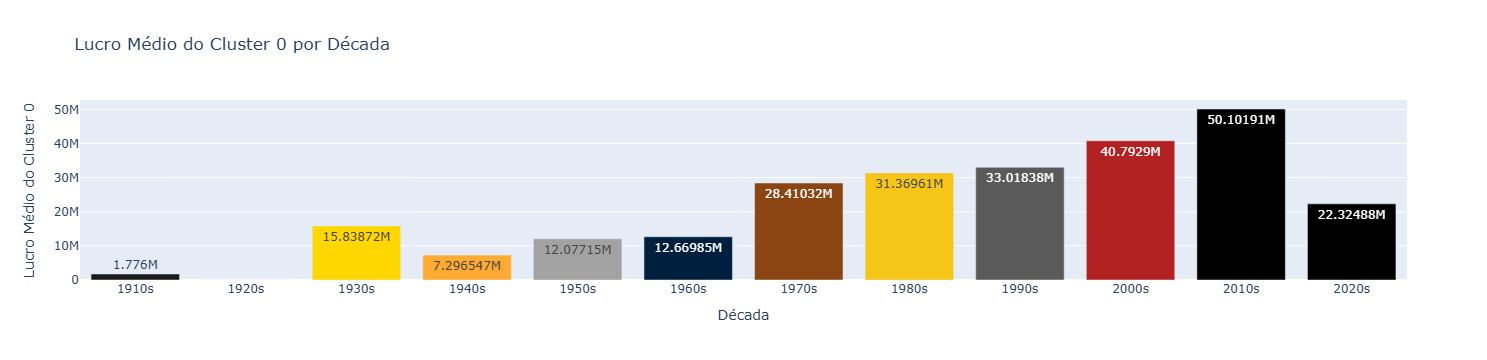

In [41]:
#Sucesso do cluster 0 (cluster que possui filmes de comédia ou subgêneros relacionados) através das décadas
filmes_decada0 = coletar_lucro_medio_decada(cluster0, filmes_decada, '0')
plotar_lucro_decada(filmes_decada0, '0')

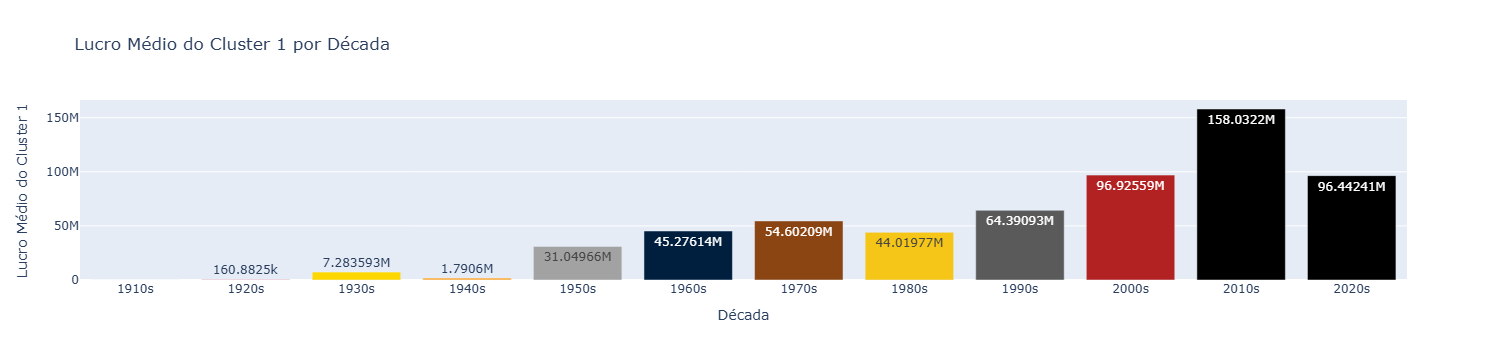

In [43]:
#Sucesso do cluster 1 (cluster que possui filmes de ação e subgêneros relacionados) através das décadas
filmes_decada1 = coletar_lucro_medio_decada(cluster1, filmes_decada, '1')
plotar_lucro_decada(filmes_decada1, '1')

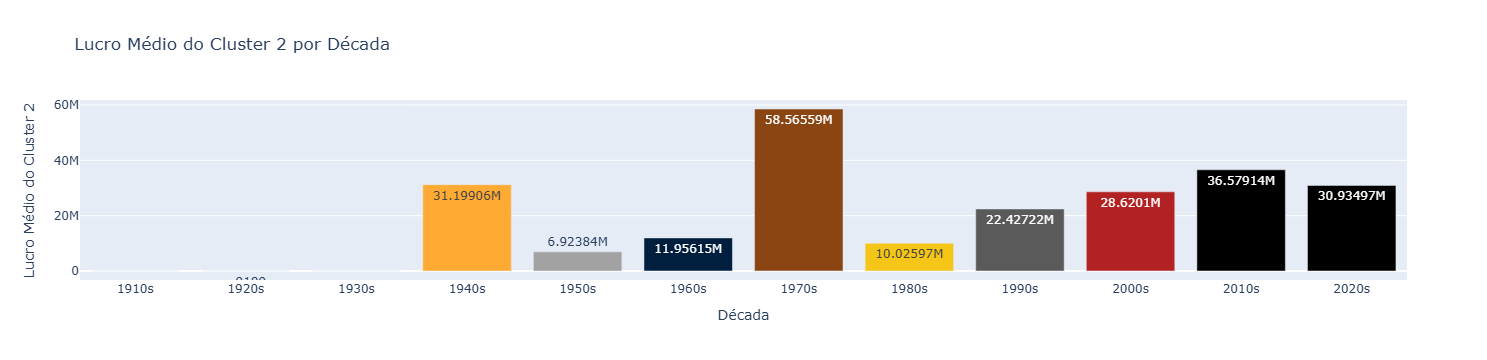

In [59]:
#Sucesso do cluster 2 (cluster que possui filmes de terror, suspense e subgêneros relacionados) através das décadas
filmes_decada2 = coletar_lucro_medio_decada(cluster2, filmes_decada, '2')
plotar_lucro_decada(filmes_decada2, '2')

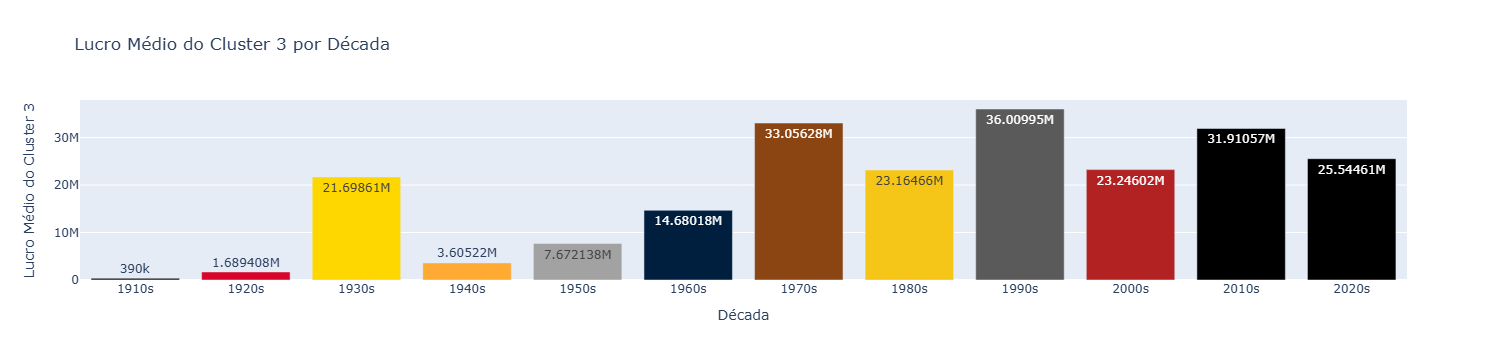

In [47]:
#Sucesso do cluster 3 (cluster que possui filmes de drama e subgêneros relacionados) através das décadas
filmes_decada3 = coletar_lucro_medio_decada(cluster3, filmes_decada, '3')
plotar_lucro_decada(filmes_decada3, '3')

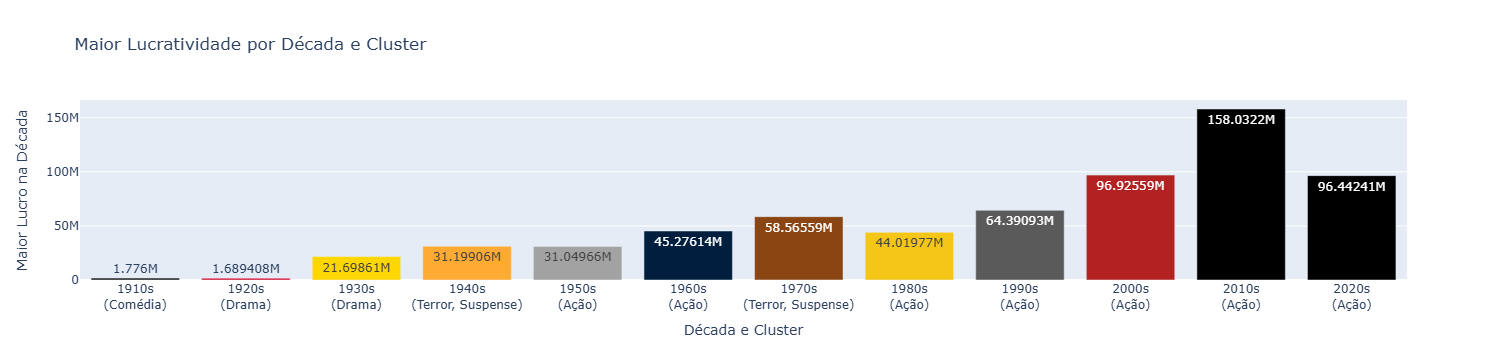

In [73]:
#Cluster mais lucrativo 
plotar_maior_lucro_decada(filmes_decada)